<a href="https://colab.research.google.com/github/Preethinigam23/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

### ***Analyzing COVID-19 Impact on Healthcare***

In the face of the ongoing COVID-19 pandemic, this project delves into a comprehensive analysis to understand its profound impact on global healthcare. Leveraging datasets encompassing hospital beds, staffing resources, and mortality rates, the primary objective is to extract valuable insights that can guide evidence-based decision-making for healthcare stakeholders.

Amid the widespread impact of the COVID-19 virus, comprehending its nuanced effects on healthcare infrastructure is crucial. The project is motivated by a commitment to offer meaningful insights for guiding strategies to mitigate the pandemic's effects. By concentrating on hospital resources, staffing dynamics, and mortality trends, the analysis seeks to provide a comprehensive view of the healthcare landscape in these challenging times.

### ***Datasets Overview***

**Covid19 Hospital Beds (BigQuery):** This dataset, obtained from BigQuery and linked to Google Colab, encompassing information on Covid19-related hospital beds in tabular form.

**Covid19 Staffing Data:** Accessed from Google Drive and mounted in Google Colab, the staffing dataset is likely in tabular format, possibly CSV. (https://drive.google.com/file/d/1aLn37e_4RWVJUv1TF6kaLFyNvDTa-KU9/view?usp=sharing)

**Covid19 Deaths (CDC Data):** Directly fetched from data.cdc.gov, the Covid19 Deaths dataset is presented in a tabular format, typically CSV.('https://data.cdc.gov/resource/xkkf-xrst.json')

In [170]:
# Importing a requried libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **1.Covid-19 Hospital Beds**





In the initial phase of exploring the dataset on Covid19 Hospital Beds, the data was obtained from BigQuery and connected to Google Colab for convenient access. The dataset, likely structured as a Pandas DataFrame, encompasses various columns containing information on Covid19-related hospital bed statistics. To enhance clarity and consistency, specific columns were renamed during the cleaning process, which also involved eliminating duplicate rows. Missing values were addressed by dropping rows with undefined 'county_name' and employing appropriate strategies for other columns. Additionally, standardizing the 'county_name' and 'state_name' columns to lowercase was undertaken for consistency.

Following these preparations, a histogram was generated to visualize the distribution of 'total_hospital_beds.' This visualization serves as an initial exploration of the numerical features within the dataset, providing a foundation for subsequent analyses. The ongoing investigation aims to derive valuable insights into the broader impact of Covid19 on healthcare infrastructure.

In [171]:
# Connecting BigQuery to Google Colab and reading the dataset
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [172]:
project_id = 'hds5210-407318'
dataset_id = "bigquery-public-data.covid19_aha"
table_id = "bigquery-public-data.covid19_aha.hospital_beds"

In [173]:
# Importing the necessary library for BigQuery interaction
from google.cloud import bigquery

def fetch_covid19_hospital_bed_data(project_id, dataset_table):
    """
    This function connects to BigQuery using the given Google Cloud project ID, executes a query
    to obtain information about hospital beds in the context of COVID-19, and gives
    the results as a Pandas DataFrame.

    """
    # Creating a BigQuery client with the specified Google Cloud project ID
    client = bigquery.Client(project=project_id)

    # Constructing the SQL query to fetch all columns from the specified dataset and table
    query = f"""
        SELECT *
        FROM {'bigquery-public-data.covid19_aha.hospital_beds'}
    """

    # Executing the query using the BigQuery client
    query_job = client.query(query)
    results = query_job.result()

    # Converting the query results into a Pandas DataFrame for analysis and manipulation
    return results.to_dataframe()

# Specifying the Google Cloud project ID and the dataset and table name
project_id = "hds5210-407318"
dataset_table_name = "bigquery-public-data.covid19_aha.hospital_beds"

# Fetching data from BigQuery using the specified parameters
covid19_hospitalbeds = fetch_covid19_hospital_bed_data(project_id, dataset_table_name)
covid19_hospitalbeds  # Displaying the fetched data

,county_fips_code,county_name,state_name,cbsa_code,total_hospital_beds,acute_long_term_care_beds,alcohol_drug_abuse_dependency_inpatient_care_beds,burn_care_beds,cardiac_intensive_care_beds,gen_medical_surgical_adult_beds,...,obstetric_care_beds,other_care_beds,other_intensive_care_beds,other_long_term_care_beds,other_special_care_beds,pediatric_intensive_care_beds,physical_rehabilitation_care_beds,psychiatric_care_beds,skilled_nursing_care_beds,num_airborne_infection_isolation_rooms
0,06097,Sonoma County,California,42220,1367,0,0,0,0,378,...,37,0,0,0,0,0,16,0,17,24
1,53061,Snohomish County,Washington,42660,831,0,14,0,0,314,...,59,20,24,0,128,0,19,25,0,50
2,25021,Norfolk County,Massachusetts,14460,1411,0,14,0,8,328,...,51,0,0,0,0,0,187,62,0,7
3,13139,Hall County,Georgia,23580,887,0,22,0,35,382,...,54,0,0,0,0,0,24,32,252,76
4,24005,Baltimore County,Maryland,12580,2061,6,52,0,9,668,...,117,34,0,0,50,0,80,396,27,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,37001,Alamance County,North Carolina,15500,197,0,0,0,0,114,...,20,0,0,0,0,0,0,25,0,11
2609,34005,Burlington County,New Jersey,37980,1035,0,0,0,10,504,...,30,0,0,0,0,0,61,191,0,31
2610,53067,Thurston County,Washington,36500,401,0,0,0,0,194,...,36,13,0,0,57,0,20,18,0,19
2611,45091,York County,South Carolina,16740,329,0,0,0,8,187,...,19,0,0,0,0,0,0,17,0,26


In [174]:
covid19_hospitalbeds.columns

Index(['county_fips_code', 'county_name', 'state_name', 'cbsa_code',
       'total_hospital_beds', 'acute_long_term_care_beds',
       'alcohol_drug_abuse_dependency_inpatient_care_beds', 'burn_care_beds',
       'cardiac_intensive_care_beds', 'gen_medical_surgical_adult_beds',
       'gen_medical_surgical_pediatric_beds', 'intermediate_nursing_care_beds',
       'medical_surgical_intensive_care_beds', 'neonatal_intensive_care_beds',
       'neonatal_intermediate_care_beds', 'obstetric_care_beds',
       'other_care_beds', 'other_intensive_care_beds',
       'other_long_term_care_beds', 'other_special_care_beds',
       'pediatric_intensive_care_beds', 'physical_rehabilitation_care_beds',
       'psychiatric_care_beds', 'skilled_nursing_care_beds',
       'num_airborne_infection_isolation_rooms'],
      dtype='object')

## **Data Cleaning**

### > Dropping the columns



In [175]:
# The specified columns are dropped in place to modify the original dataset to streamline and focus on relevant information
covid19_hospitalbeds.drop(columns = ['county_fips_code',
                                     'cbsa_code', 'acute_long_term_care_beds',
                                     'alcohol_drug_abuse_dependency_inpatient_care_beds',
                                     'alcohol_drug_abuse_dependency_inpatient_care_beds','burn_care_beds',
                                     'other_care_beds','other_intensive_care_beds',
                                     'other_long_term_care_beds','other_special_care_beds',
                                     'skilled_nursing_care_beds','intermediate_nursing_care_beds',
                                     'neonatal_intensive_care_beds','neonatal_intermediate_care_beds'], inplace=True)
covid19_hospitalbeds.columns # Updated dataset

Index(['county_name', 'state_name', 'total_hospital_beds',
       'cardiac_intensive_care_beds', 'gen_medical_surgical_adult_beds',
       'gen_medical_surgical_pediatric_beds',
       'medical_surgical_intensive_care_beds', 'obstetric_care_beds',
       'pediatric_intensive_care_beds', 'physical_rehabilitation_care_beds',
       'psychiatric_care_beds', 'num_airborne_infection_isolation_rooms'],
      dtype='object')



### > Renaming the columns and dropping the duplicates from the dataset





In [176]:
def clean_covid19_hospitalbeds_data(dataframe):
    """
    This function includes the following steps:
    Renaming specific columns for clarity and consistency, and Dropping duplicate rows in the DataFrame.

    """
    # Renaming specified columns in the DataFrame
    dataframe.rename(columns={'gen_medical_surgical_adult_beds': 'adult_med_surg_beds',
                              'gen_medical_surgical_pediatric_beds': 'pediatric_med_surg_beds',
                              'num_airborne_infection_isolation_rooms': 'airborne_infection_isolation_rooms'}, inplace=True)

    # Dropping duplicate rows in the DataFrame
    dataframe.drop_duplicates(inplace=True)

# Applying the data cleaning function to the original DataFrame
clean_covid19_hospitalbeds_data(covid19_hospitalbeds)

### > Handling Missing Values



In [177]:
covid19_hospitalbeds.isnull().sum()

county_name                               8
state_name                                0
total_hospital_beds                     105
cardiac_intensive_care_beds             534
adult_med_surg_beds                     534
pediatric_med_surg_beds                 534
medical_surgical_intensive_care_beds    534
obstetric_care_beds                     534
pediatric_intensive_care_beds           534
physical_rehabilitation_care_beds       534
psychiatric_care_beds                   534
airborne_infection_isolation_rooms      786
dtype: int64

In [178]:
# Dropping rows with missing values in the 'county_name' column
covid19_hospitalbeds.dropna(subset=['county_name'], inplace=True)

# Filling missing values in the 'total_hospital_beds' column with the median of the column
covid19_hospitalbeds['total_hospital_beds'].fillna(covid19_hospitalbeds['total_hospital_beds'].median(), inplace=True)

# List of columns for which missing values will be imputed with the rounded mean
columns_to_impute = ['cardiac_intensive_care_beds', 'adult_med_surg_beds', 'pediatric_med_surg_beds',
                      'medical_surgical_intensive_care_beds',
                      'obstetric_care_beds',
                      'pediatric_intensive_care_beds', 'physical_rehabilitation_care_beds',
                      'psychiatric_care_beds','airborne_infection_isolation_rooms']

# Iterating through the specified columns and filling missing values with the rounded mean
for col in columns_to_impute:
    covid19_hospitalbeds[col].fillna(round(covid19_hospitalbeds[col].mean()), inplace=True) # The specified columns' missing values are filled with the rounded mean.

In [179]:
covid19_hospitalbeds.isnull().sum()

county_name                             0
state_name                              0
total_hospital_beds                     0
cardiac_intensive_care_beds             0
adult_med_surg_beds                     0
pediatric_med_surg_beds                 0
medical_surgical_intensive_care_beds    0
obstetric_care_beds                     0
pediatric_intensive_care_beds           0
physical_rehabilitation_care_beds       0
psychiatric_care_beds                   0
airborne_infection_isolation_rooms      0
dtype: int64

### Converting the 'county_name' and 'state_name' columns values to lowercase for uniformity



In [180]:
covid19_hospitalbeds['county_name'] = covid19_hospitalbeds['county_name'].str.lower()

covid19_hospitalbeds['state_name'] = covid19_hospitalbeds['state_name'].str.lower()

# The above operations ensure that the county and state names are consistently in lowercase to merging easier and for analysis.

In [181]:
covid19_hospitalbeds # updated covid19_hospitalbeds data

,county_name,state_name,total_hospital_beds,cardiac_intensive_care_beds,adult_med_surg_beds,pediatric_med_surg_beds,medical_surgical_intensive_care_beds,obstetric_care_beds,pediatric_intensive_care_beds,physical_rehabilitation_care_beds,psychiatric_care_beds,airborne_infection_isolation_rooms
0,sonoma county,california,1367,0,378,13,56,37,0,16,0,24
1,snohomish county,washington,831,0,314,13,61,59,0,19,25,50
2,norfolk county,massachusetts,1411,8,328,17,23,51,0,187,62,7
3,hall county,georgia,887,35,382,18,50,54,0,24,32,76
4,baltimore county,maryland,2061,9,668,18,95,117,0,80,396,82
...,...,...,...,...,...,...,...,...,...,...,...,...
2608,alamance county,north carolina,197,0,114,6,20,20,0,0,25,11
2609,burlington county,new jersey,1035,10,504,7,54,30,0,61,191,31
2610,thurston county,washington,401,0,194,9,32,36,0,20,18,19
2611,york county,south carolina,329,8,187,12,24,19,0,0,17,26


In [182]:
covid19_hospitalbeds.columns

Index(['county_name', 'state_name', 'total_hospital_beds',
       'cardiac_intensive_care_beds', 'adult_med_surg_beds',
       'pediatric_med_surg_beds', 'medical_surgical_intensive_care_beds',
       'obstetric_care_beds', 'pediatric_intensive_care_beds',
       'physical_rehabilitation_care_beds', 'psychiatric_care_beds',
       'airborne_infection_isolation_rooms'],
      dtype='object')

# **Visualization-1**

## **Generating a Histogram**

The displayed histogram indicates the frequency distribution of hospital beds. We see that most of the data is skewed towards smaller values, implying that the majority of hospitals in the dataset have a lower count of beds. Peaks in the histogram reflect common bed count ranges where numerous hospitals are grouped. If there are any bars separated from the main cluster on the right, they denote hospitals with exceptionally high bed counts, which are rare compared to the general trend. This visualization is useful for assessing the overall hospital capacity distribution within the healthcare framework.

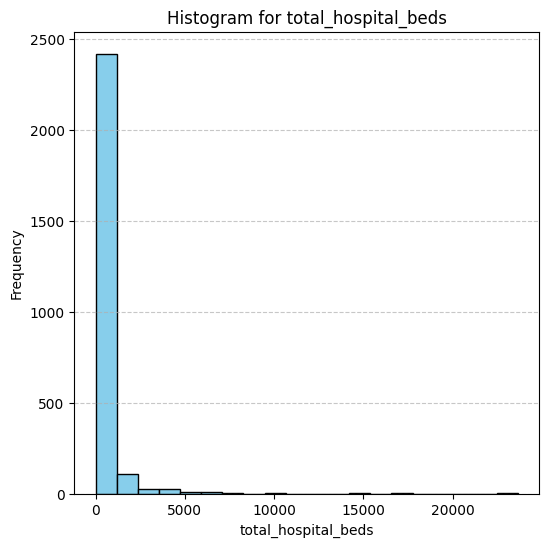

In [183]:
# Selecting the column for the histogram
column_to_plot = 'total_hospital_beds'


# Droping the rows with missing values in the selected column
histogram_data = covid19_hospitalbeds[column_to_plot].dropna()

# Ploting the histogram
plt.figure(figsize=(6, 6))
plt.hist(histogram_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram for {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



---



# **Second Dataset**

# **Covid-19 Staffing Data**

The Covid-19 Staffing Data, which was sourced from Google Drive and mounted in Google colab. The dataset, likely structured as a CSV, encompasses various columns related to staffing dynamics in healthcare facilities. I involve Cleaning steps like dropping unncessary columns to streamline the dataset for relevant information, Missing values were addressed through appropriate strategies, such as imputing with mean or median and forward filling for specific columns. The other steps I want to include Handling data types to ensure accurate representation and consistency. Duplicate rows were removed for data integrity, and columns containing county and state names were converted to lowercase for uniformity for merging the data.

The key aspect is that creating staffing summary, aggregating values for esstential personnel categories like total personnel, registered nurses, and pharmacy technicians. This summary serves as condensed view for further analysis.

In [184]:
from google.colab import drive # Mounted the Google drive to google colab

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
def download_csv_from_drive(file_id):
    """
    Downloaded a CSV file from Google Drive using its file ID. This function constructs a download link based on the provided file ID and
    reads the CSV data into a Pandas Dataframe.
    """
# Constructed the downloaded link using the file ID
    download_link = f'https://drive.google.com/uc?id={file_id}'

# Reading the CSV data into dataframe
    return pd.read_csv(download_link)

# usage
# The below is the file_id for the staffing data CSV file and downloaded the staffing data using file_id
file_id_staffing_data = '1aLn37e_4RWVJUv1TF6kaLFyNvDTa-KU9'
covid19_staffing_data = download_csv_from_drive(file_id_staffing_data)

covid19_staffing_data # Displaying the original dataset before cleaning

,county_fips_code,county_name,state_name,cbsa_code,total_personnel_ft,total_hospital_unit_personnel_ft,physicians_and_dentists_ft,registered_nurses_pt,all_other_personnel_ft,full_time_nursing_home_rns,...,other_trainees_pt,part_time_nursing_home_rns,pharmacists_licensed_pt,pharmacy_technicians_pt,physicians_and_dentists_pt,radiology_technicians_pt,respiratory_therapists_pt,total_hospital_unit_personnel_pt,total_nursing_home_personnel_pt,total_personnel_pt
0,27053,Hennepin County,Minnesota,33460.0,20379.0,20358.0,1218.0,9602.0,11156.0,14.0,...,56.0,38.0,257.0,160.0,697.0,509.0,322.0,21058.0,62.0,21120.0
1,25025,Suffolk County,Massachusetts,14460.0,68508.0,67729.0,4694.0,7851.0,38039.0,73.0,...,46.0,76.0,301.0,219.0,1348.0,891.0,165.0,23687.0,785.0,24472.0
2,46099,Minnehaha County,South Dakota,43620.0,11701.0,11524.0,652.0,1313.0,5233.0,66.0,...,1.0,14.0,64.0,43.0,119.0,239.0,62.0,4950.0,237.0,5187.0
3,16001,Ada County,Idaho,14260.0,13583.0,13520.0,673.0,1348.0,6712.0,45.0,...,59.0,8.0,76.0,52.0,219.0,203.0,84.0,4240.0,8.0,4248.0
4,9003,Hartford County,Connecticut,25540.0,15323.0,15271.0,527.0,2368.0,8423.0,16.0,...,26.0,18.0,78.0,55.0,240.0,228.0,140.0,7605.0,63.0,7668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42019,Butler County,Pennsylvania,38300.0,1215.0,1127.0,0.0,259.0,623.0,NaN,...,0.0,NaN,3.0,4.0,0.0,59.0,13.0,667.0,68.0,735.0
996,13157,Jackson County,Georgia,27600.0,266.0,266.0,2.0,91.0,105.0,NaN,...,0.0,NaN,4.0,4.0,1.0,9.0,8.0,235.0,0.0,235.0
997,51005,Alleghany County,Virginia,0.0,437.0,437.0,5.0,74.0,187.0,NaN,...,0.0,NaN,4.0,4.0,1.0,10.0,8.0,206.0,0.0,206.0
998,21199,Pulaski County,Kentucky,43700.0,1049.0,1049.0,7.0,92.0,416.0,NaN,...,0.0,NaN,4.0,4.0,1.0,9.0,8.0,237.0,0.0,237.0


In [186]:
covid19_staffing_data.columns

Index(['county_fips_code', 'county_name', 'state_name', 'cbsa_code',
       'total_personnel_ft', 'total_hospital_unit_personnel_ft',
       'physicians_and_dentists_ft', 'registered_nurses_pt',
       'all_other_personnel_ft', 'full_time_nursing_home_rns',
       'laboratory_technicians_ft', 'licensed_practical_vocational_nurses_ft',
       'medical_dental_residents_interns_ft', 'nursing_assistive_personnel_ft',
       'other_trainees_ft', 'pharmacists_licensed_ft',
       'pharmacy_technicians_ft', 'radiology_technicians_ft',
       'registered_nurses_ft', 'respiratory_therapists_ft',
       'total_nursing_home_personnel_ft', 'cardiac_intensive_care_fte',
       'intensivists_fte_total', 'medical_surgical_intensive_care_fte',
       'neonatal_care_fte', 'other_intensive_care_fte',
       'pediatric_intensive_care_fte', 'all_other_personnel_pt',
       'laboratory_technicians_pt', 'licensed_practical_vocational_nurses_pt',
       'medical_dental_residents_interns_pt', 'nursing_assisti

# **Data Cleaning**

### > Dropping the columns






In [187]:
# Dropping unnecessary columns from the COVID-19 staffing data DataFrame
# The specified columns are removed to streamline and focus on relevant information related to staffing.

covid19_staffing_data.drop(columns=['county_fips_code', 'cbsa_code',
                                    'full_time_nursing_home_rns', 'all_other_personnel_ft',
                                    'other_trainees_ft', 'licensed_practical_vocational_nurses_ft',
                                    'other_intensive_care_fte', 'all_other_personnel_pt',
                                    'other_trainees_pt', 'part_time_nursing_home_rns', 'pharmacists_licensed_pt',
                                    'pharmacy_technicians_pt', 'physicians_and_dentists_pt', 'radiology_technicians_pt',
                                    'respiratory_therapists_pt', 'total_hospital_unit_personnel_pt',
                                    'total_nursing_home_personnel_pt', 'total_personnel_pt', 'laboratory_technicians_pt',
                                    'licensed_practical_vocational_nurses_pt',
                                    'medical_dental_residents_interns_pt',
                                    'nursing_assistive_personnel_pt', 'registered_nurses_pt'], inplace=True)
# The specified columns are dropped in place to modify the original DataFrame.

In [188]:
covid19_staffing_data.columns

Index(['county_name', 'state_name', 'total_personnel_ft',
       'total_hospital_unit_personnel_ft', 'physicians_and_dentists_ft',
       'laboratory_technicians_ft', 'medical_dental_residents_interns_ft',
       'nursing_assistive_personnel_ft', 'pharmacists_licensed_ft',
       'pharmacy_technicians_ft', 'radiology_technicians_ft',
       'registered_nurses_ft', 'respiratory_therapists_ft',
       'total_nursing_home_personnel_ft', 'cardiac_intensive_care_fte',
       'intensivists_fte_total', 'medical_surgical_intensive_care_fte',
       'neonatal_care_fte', 'pediatric_intensive_care_fte'],
      dtype='object')



### > Changing the Datatype Formats


In [189]:
covid19_staffing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   county_name                          995 non-null    object 
 1   state_name                           1000 non-null   object 
 2   total_personnel_ft                   895 non-null    float64
 3   total_hospital_unit_personnel_ft     895 non-null    float64
 4   physicians_and_dentists_ft           895 non-null    float64
 5   laboratory_technicians_ft            895 non-null    float64
 6   medical_dental_residents_interns_ft  895 non-null    float64
 7   nursing_assistive_personnel_ft       895 non-null    float64
 8   pharmacists_licensed_ft              895 non-null    float64
 9   pharmacy_technicians_ft              895 non-null    float64
 10  radiology_technicians_ft             895 non-null    float64
 11  registered_nurses_ft           

In [190]:
# Coverting the 'total_hospital_unit_personnel_ft','cardiac_intensive_care_fte', 'total_nursing_home_personnel_ft' columns to Nullable Integer Type (Int64)
#This is conversions is performed to handle potential missing values and maintain the appropriate data type.

covid19_staffing_data['total_hospital_unit_personnel_ft'] = covid19_staffing_data['total_hospital_unit_personnel_ft'].astype('Int64')

covid19_staffing_data['cardiac_intensive_care_fte'] = covid19_staffing_data['cardiac_intensive_care_fte'].astype('Int64')

covid19_staffing_data['total_nursing_home_personnel_ft'] = covid19_staffing_data['total_nursing_home_personnel_ft'].astype('Int64')



### >  Handling missing values



In [191]:
covid19_staffing_data.isnull().sum()

county_name                              5
state_name                               0
total_personnel_ft                     105
total_hospital_unit_personnel_ft       105
physicians_and_dentists_ft             105
laboratory_technicians_ft              105
medical_dental_residents_interns_ft    105
nursing_assistive_personnel_ft         105
pharmacists_licensed_ft                105
pharmacy_technicians_ft                105
radiology_technicians_ft               105
registered_nurses_ft                   105
respiratory_therapists_ft              105
total_nursing_home_personnel_ft        105
cardiac_intensive_care_fte             884
intensivists_fte_total                 847
medical_surgical_intensive_care_fte    850
neonatal_care_fte                      880
pediatric_intensive_care_fte           883
dtype: int64

In [192]:
# Dropping rows with missing values in the 'county_name' column to preserve data related to specific counties.
covid19_staffing_data.dropna(subset=['county_name'], inplace=True)

# Fill missing values in the 'total_personnel_ft' column with the mean
# Imputation is performed to address any missing values in the overall personnel count.
covid19_staffing_data['total_personnel_ft'].fillna(covid19_staffing_data['total_personnel_ft'].mean(), inplace=True)

# Fill missing values in the 'cardiac_intensive_care_fte' column with the median
# This imputation strategy is applied to handle potential missing values in cardiac intensive care personnel.
covid19_staffing_data['cardiac_intensive_care_fte'].fillna(covid19_staffing_data['cardiac_intensive_care_fte'].median(), inplace=True)

# Fill missing values in the 'intensivists_fte_total' and 'pediatric_intensive_care_fte' columns with 0
# Imputation with 0 is done to account for the absence of intensivists and pediatric intensive care, assuming no personnel in this category.
covid19_staffing_data['intensivists_fte_total'].fillna(0, inplace=True)
covid19_staffing_data['pediatric_intensive_care_fte'].fillna(0, inplace=True)

# Fill missing values in the 'neonatal_care_fte' column using the forward fill method
# Forward fill is applied to propagate the last observed non-missing value.
covid19_staffing_data['neonatal_care_fte'].fillna(method='ffill', inplace=True)

In [193]:
# List of columns to impute missing values
columns_to_impute_staffing = [
    'total_hospital_unit_personnel_ft',
    'physicians_and_dentists_ft',
    'laboratory_technicians_ft', 'medical_dental_residents_interns_ft',
    'nursing_assistive_personnel_ft', 'pharmacists_licensed_ft',
    'pharmacy_technicians_ft', 'radiology_technicians_ft',
    'registered_nurses_ft', 'respiratory_therapists_ft',
    'total_nursing_home_personnel_ft','medical_surgical_intensive_care_fte'
]

# Iterating through the specified columns and filling missing values with the rounded median
# This imputation strategy ensures that missing values are replaced with a central tendency measure.
for col in columns_to_impute_staffing:
    covid19_staffing_data[col].fillna(round(covid19_staffing_data[col].median()), inplace=True)

In [194]:
covid19_staffing_data.isnull().sum()

county_name                            0
state_name                             0
total_personnel_ft                     0
total_hospital_unit_personnel_ft       0
physicians_and_dentists_ft             0
laboratory_technicians_ft              0
medical_dental_residents_interns_ft    0
nursing_assistive_personnel_ft         0
pharmacists_licensed_ft                0
pharmacy_technicians_ft                0
radiology_technicians_ft               0
registered_nurses_ft                   0
respiratory_therapists_ft              0
total_nursing_home_personnel_ft        0
cardiac_intensive_care_fte             0
intensivists_fte_total                 0
medical_surgical_intensive_care_fte    0
neonatal_care_fte                      0
pediatric_intensive_care_fte           0
dtype: int64

Dropping the duplicates from the Dataset and converting the columns 'state_name', 'county_name' values to lowercase for merging the dataset

In [195]:
# Removing duplicate rows from COVID19 staffing data dataframe

covid19_staffing_data.drop_duplicates(inplace=True)

# Converting the 'county_name' and 'state_name' columns values to lowercase  for uniformity
covid19_staffing_data['county_name'] = covid19_staffing_data['county_name'].str.lower()
covid19_staffing_data['state_name'] = covid19_staffing_data['state_name'].str.lower()

# The above operations ensures that the county and states names are consistently in lowercase for easier comparison and analysis.

covid19_staffing_data # Displaying the cleaned dataset

,county_name,state_name,total_personnel_ft,total_hospital_unit_personnel_ft,physicians_and_dentists_ft,laboratory_technicians_ft,medical_dental_residents_interns_ft,nursing_assistive_personnel_ft,pharmacists_licensed_ft,pharmacy_technicians_ft,radiology_technicians_ft,registered_nurses_ft,respiratory_therapists_ft,total_nursing_home_personnel_ft,cardiac_intensive_care_fte,intensivists_fte_total,medical_surgical_intensive_care_fte,neonatal_care_fte,pediatric_intensive_care_fte
0,hennepin county,minnesota,20379.0,20358,1218.0,686.0,392.0,1112.0,370.0,297.0,546.0,4074.0,307.0,21,55,213.0,86.0,35.0,30.0
1,suffolk county,massachusetts,68508.0,67729,4694.0,1064.0,4580.0,2699.0,758.0,584.0,1244.0,13297.0,487.0,779,33,333.0,140.0,81.0,53.0
2,minnehaha county,south dakota,11701.0,11524,652.0,331.0,27.0,858.0,198.0,145.0,319.0,3338.0,142.0,177,2,41.0,16.0,15.0,8.0
3,ada county,idaho,13583.0,13520,673.0,311.0,25.0,1347.0,196.0,108.0,361.0,3274.0,182.0,63,0,21.0,3.0,12.0,6.0
4,hartford county,connecticut,15323.0,15271,527.0,304.0,177.0,1125.0,145.0,168.0,347.0,3784.0,209.0,52,4,101.0,36.0,22.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,butler county,pennsylvania,1215.0,1127,0.0,59.0,0.0,119.0,13.0,13.0,62.0,290.0,18.0,88,8,0.0,36.0,3.0,0.0
996,jackson county,georgia,266.0,266,2.0,6.0,3.0,24.0,3.0,3.0,8.0,103.0,6.0,0,8,0.0,36.0,3.0,0.0
997,alleghany county,virginia,437.0,437,5.0,11.0,5.0,36.0,5.0,5.0,14.0,152.0,10.0,0,8,0.0,36.0,3.0,0.0
998,pulaski county,kentucky,1049.0,1049,7.0,24.0,13.0,93.0,13.0,13.0,30.0,406.0,22.0,0,8,0.0,36.0,3.0,0.0


## **Data Pivoting**

 The pivot table created using the function 'create_staffing_summary', applied to the Covid-19 Staffing Data, offers a concise presentation of personnel statistics across different regions, facilitating a clearer understanding of staffing dynamics in healthcare facilities.

In [196]:
def create_staffing_summary(dataframe):
    """
    Creating a summarized view of staffing data by aggregating values for key personnel categories, grouped by county and state.This function takes a DataFrame
    containing staffing data, focuses on specific columns of interest, and generates a summary. The resulting DataFrame, 'staffing_summary', showcases aggregated values
    for total personnel, registered nurses, and pharmacy technicians, organized by county and state.

    """
    # Identify columns of interest for creating the staffing summary
    selected_columns = ['total_personnel_ft', 'registered_nurses_ft', 'pharmacy_technicians_ft']

    # The resulting DataFrame provides aggregated values for each county and state.
    staffing_summary = dataframe.pivot_table(
        values=selected_columns,
        index=['county_name', 'state_name']
    ).reset_index()

# Applying the function to the staffing data
pivoted_staffing_data = create_staffing_summary(covid19_staffing_data)

# Displaying the pivot table
pivoted_staffing_data



---



# **Data Merging**

Now the both datasets 'Covid-19 Hospitalbeds and Staffing data' are updated. I want to merge this both dataset based on 'county_name' and 'state_name'.Further I want to perform some field-level transformations like Standardscaler, identification of outliers and removing them by Z-score, and Visualizations like Barplot. Additionally, a pairplot that explores relationship between some columns, offer insights into potential coorelations and patterns in the merged dataset.

In [197]:
# Merging COVID-19 hospital beds and staffing data into a single Dataframe
# The merging is performed based on matching 'county_name' amd 'state_name' columns using an inner join.

merged_hospital_staffing_data = pd.merge(covid19_hospitalbeds, covid19_staffing_data, on=['county_name', 'state_name'], how='inner')

# The resulting Dataframe, 'merged_hospital_staffing_data', now contains combined information about hospital beds and staffing.

In [198]:
merged_hospital_staffing_data

,county_name,state_name,total_hospital_beds,cardiac_intensive_care_beds,adult_med_surg_beds,pediatric_med_surg_beds,medical_surgical_intensive_care_beds,obstetric_care_beds,pediatric_intensive_care_beds,physical_rehabilitation_care_beds,...,pharmacy_technicians_ft,radiology_technicians_ft,registered_nurses_ft,respiratory_therapists_ft,total_nursing_home_personnel_ft,cardiac_intensive_care_fte,intensivists_fte_total,medical_surgical_intensive_care_fte,neonatal_care_fte,pediatric_intensive_care_fte
0,snohomish county,washington,831,0,314,13,61,59,0,19,...,2.0,8.0,53.0,4.0,0,8,0.0,36.0,4.0,0.0
1,snohomish county,washington,78,7,167,12,23,24,2,14,...,2.0,8.0,53.0,4.0,0,8,0.0,36.0,4.0,0.0
2,hall county,georgia,887,35,382,18,50,54,0,24,...,68.0,134.0,1372.0,73.0,230,8,0.0,36.0,19.0,0.0
3,hall county,georgia,887,35,382,18,50,54,0,24,...,5.0,17.0,141.0,8.0,0,8,0.0,36.0,3.0,0.0
4,hall county,georgia,100,7,167,12,23,24,2,14,...,68.0,134.0,1372.0,73.0,230,8,0.0,36.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,wicomico county,maryland,426,8,206,8,16,20,0,0,...,26.0,61.0,598.0,38.0,74,8,7.0,7.0,3.0,0.0
1141,coahoma county,mississippi,181,0,140,10,10,11,0,0,...,5.0,7.0,114.0,10.0,0,8,0.0,36.0,3.0,0.0
1142,beltrami county,minnesota,231,12,40,11,10,15,10,10,...,28.0,60.0,359.0,15.0,22,8,0.0,36.0,4.0,0.0
1143,lancaster county,pennsylvania,857,16,537,37,38,82,0,8,...,69.0,167.0,1110.0,59.0,0,8,48.0,8.0,24.0,1.0


In [199]:
merged_hospital_staffing_data.columns

Index(['county_name', 'state_name', 'total_hospital_beds',
       'cardiac_intensive_care_beds', 'adult_med_surg_beds',
       'pediatric_med_surg_beds', 'medical_surgical_intensive_care_beds',
       'obstetric_care_beds', 'pediatric_intensive_care_beds',
       'physical_rehabilitation_care_beds', 'psychiatric_care_beds',
       'airborne_infection_isolation_rooms', 'total_personnel_ft',
       'total_hospital_unit_personnel_ft', 'physicians_and_dentists_ft',
       'laboratory_technicians_ft', 'medical_dental_residents_interns_ft',
       'nursing_assistive_personnel_ft', 'pharmacists_licensed_ft',
       'pharmacy_technicians_ft', 'radiology_technicians_ft',
       'registered_nurses_ft', 'respiratory_therapists_ft',
       'total_nursing_home_personnel_ft', 'cardiac_intensive_care_fte',
       'intensivists_fte_total', 'medical_surgical_intensive_care_fte',
       'neonatal_care_fte', 'pediatric_intensive_care_fte'],
      dtype='object')

In [200]:
merged_hospital_staffing_data.isnull().sum()

county_name                             0
state_name                              0
total_hospital_beds                     0
cardiac_intensive_care_beds             0
adult_med_surg_beds                     0
pediatric_med_surg_beds                 0
medical_surgical_intensive_care_beds    0
obstetric_care_beds                     0
pediatric_intensive_care_beds           0
physical_rehabilitation_care_beds       0
psychiatric_care_beds                   0
airborne_infection_isolation_rooms      0
total_personnel_ft                      0
total_hospital_unit_personnel_ft        0
physicians_and_dentists_ft              0
laboratory_technicians_ft               0
medical_dental_residents_interns_ft     0
nursing_assistive_personnel_ft          0
pharmacists_licensed_ft                 0
pharmacy_technicians_ft                 0
radiology_technicians_ft                0
registered_nurses_ft                    0
respiratory_therapists_ft               0
total_nursing_home_personnel_ft   

## **Field-level Transformations**

In [201]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Selected numeric columns for standardization
numeric_columns = ['total_hospital_beds', 'total_personnel_ft']

# Standardizing the numeric columns
merged_hospital_staffing_data[numeric_columns] = scaler.fit_transform(merged_hospital_staffing_data[numeric_columns])

merged_hospital_staffing_data[numeric_columns] #Displaying the scaling performed data

,total_hospital_beds,total_personnel_ft
0,0.112490,-0.062095
1,-0.306355,-0.062095
2,0.143640,0.034670
3,0.143640,-0.318234
4,-0.294118,0.034670
...,...,...
1140,-0.112785,-0.124038
1141,-0.249063,-0.331385
1142,-0.221251,-0.186908
1143,0.126953,0.111412


In [202]:
from scipy.stats import zscore

# Identifing and removing the outliers using Z-score
z_scores = zscore(merged_hospital_staffing_data[numeric_columns])
merged_hospital_staffing_data_ouliers = merged_hospital_staffing_data[(z_scores < 3).all(axis=1)]

merged_hospital_staffing_data_ouliers

,county_name,state_name,total_hospital_beds,cardiac_intensive_care_beds,adult_med_surg_beds,pediatric_med_surg_beds,medical_surgical_intensive_care_beds,obstetric_care_beds,pediatric_intensive_care_beds,physical_rehabilitation_care_beds,...,pharmacy_technicians_ft,radiology_technicians_ft,registered_nurses_ft,respiratory_therapists_ft,total_nursing_home_personnel_ft,cardiac_intensive_care_fte,intensivists_fte_total,medical_surgical_intensive_care_fte,neonatal_care_fte,pediatric_intensive_care_fte
0,snohomish county,washington,0.112490,0,314,13,61,59,0,19,...,2.0,8.0,53.0,4.0,0,8,0.0,36.0,4.0,0.0
1,snohomish county,washington,-0.306355,7,167,12,23,24,2,14,...,2.0,8.0,53.0,4.0,0,8,0.0,36.0,4.0,0.0
2,hall county,georgia,0.143640,35,382,18,50,54,0,24,...,68.0,134.0,1372.0,73.0,230,8,0.0,36.0,19.0,0.0
3,hall county,georgia,0.143640,35,382,18,50,54,0,24,...,5.0,17.0,141.0,8.0,0,8,0.0,36.0,3.0,0.0
4,hall county,georgia,-0.294118,7,167,12,23,24,2,14,...,68.0,134.0,1372.0,73.0,230,8,0.0,36.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,wicomico county,maryland,-0.112785,8,206,8,16,20,0,0,...,26.0,61.0,598.0,38.0,74,8,7.0,7.0,3.0,0.0
1141,coahoma county,mississippi,-0.249063,0,140,10,10,11,0,0,...,5.0,7.0,114.0,10.0,0,8,0.0,36.0,3.0,0.0
1142,beltrami county,minnesota,-0.221251,12,40,11,10,15,10,10,...,28.0,60.0,359.0,15.0,22,8,0.0,36.0,4.0,0.0
1143,lancaster county,pennsylvania,0.126953,16,537,37,38,82,0,8,...,69.0,167.0,1110.0,59.0,0,8,48.0,8.0,24.0,1.0


# **Visualization-2**

## **Barplot**

The bar chart seems to compare the total number of hospital beds available in the top ten states, highlighting the disparities in hospital capacity among them. The bars' lengths indicate the quantity of beds, with some states showing a much larger capacity than others. The presence of error bars may point to a range of bed counts within each state, potentially reflecting the diversity of hospital sizes or the number of hospitals. States represented by longer bars are better equipped with more hospital beds. This visualization serves as a quick visual summary to assess the healthcare capabilities across different states


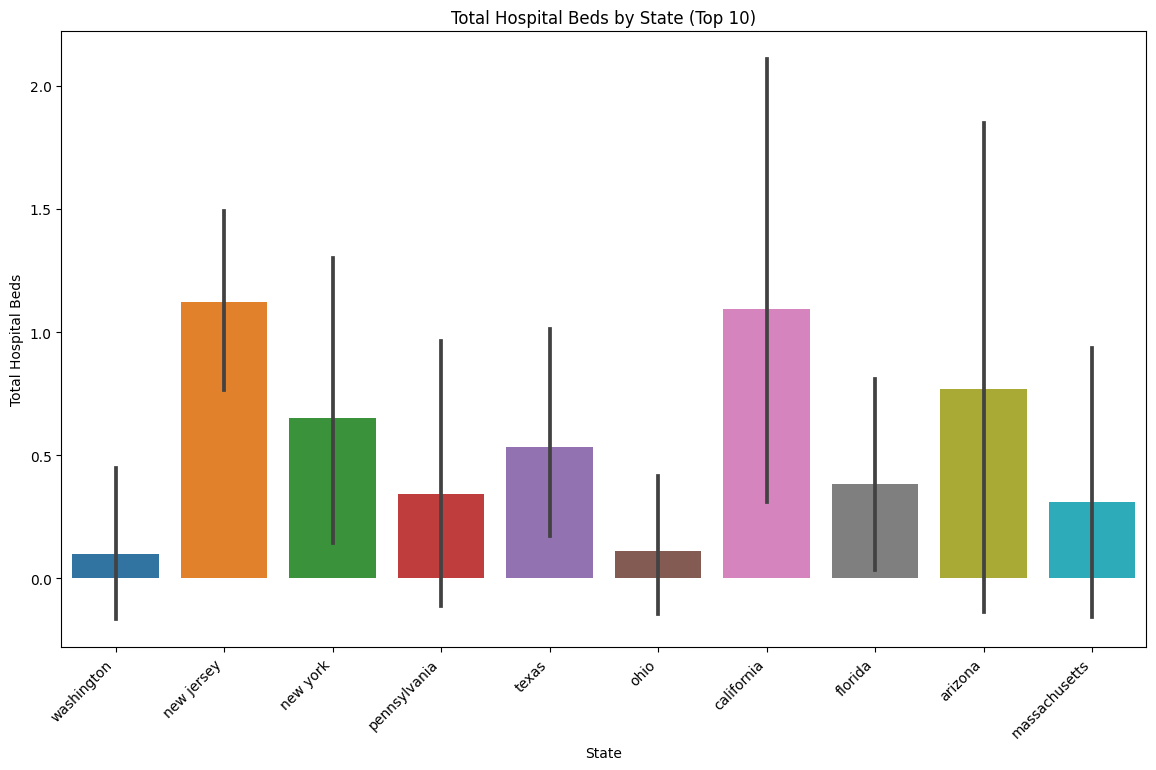

In [203]:
# Selecting the top 10 states based on total hospital beds
top_states = merged_hospital_staffing_data.groupby('state_name')['total_hospital_beds'].sum().sort_values(ascending=False).head(10).index

# Filtering the data for the top 10 states
filtered_data = merged_hospital_staffing_data[merged_hospital_staffing_data['state_name'].isin(top_states)]

# Creating a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='state_name', y='total_hospital_beds', data=filtered_data)
plt.title('Total Hospital Beds by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Total Hospital Beds')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Visualization-3**

## **Pairplot**

To visualize the pairwise relationship between columns and hepls in exploring the potential coorelation and patterns in the data

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


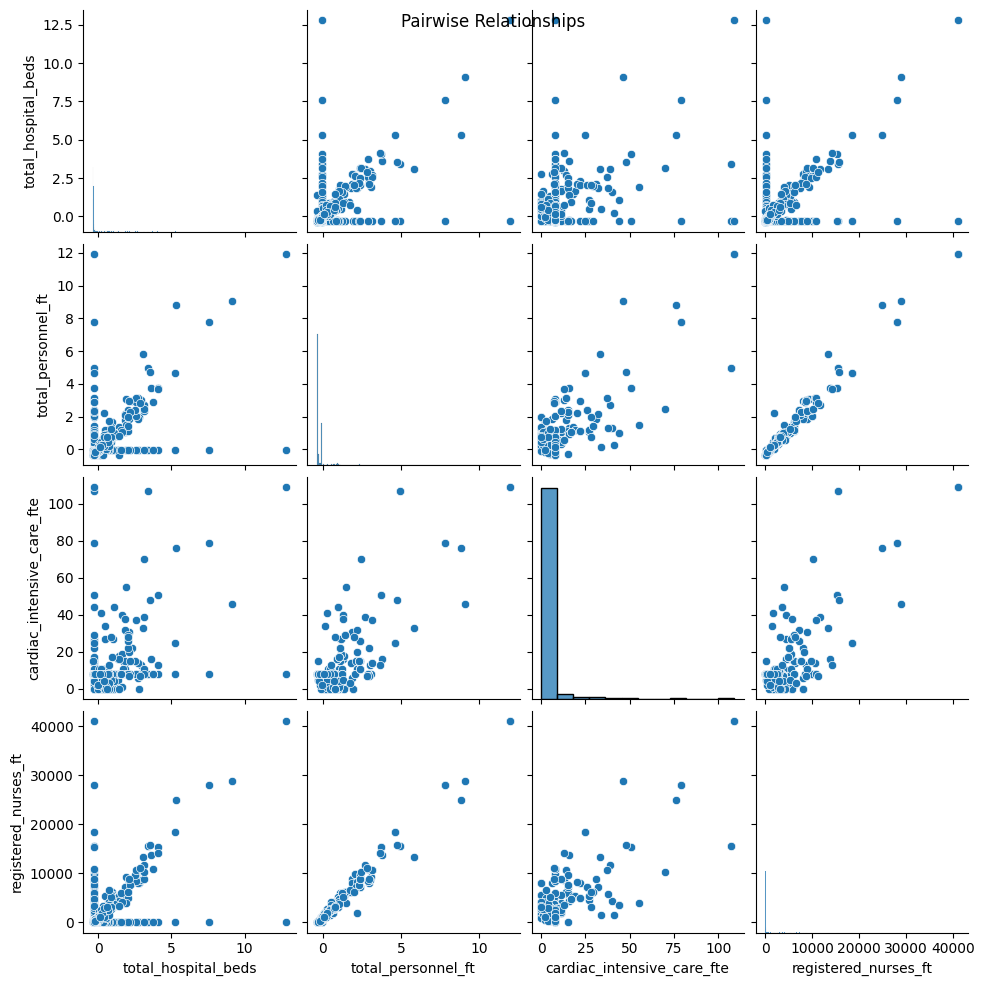

In [204]:
# Selecting specfic columns of interest for creating a pairplot
columns_of_interest = ['total_hospital_beds', 'total_personnel_ft', 'cardiac_intensive_care_fte', 'registered_nurses_ft']

# Creating a pairplot to visualize pairwise relationship between selected columns
# This helps in exploring potential correlation and patterns in the data.

sns.pairplot(merged_hospital_staffing_data[columns_of_interest])

# Adding a title
plt.suptitle('Pairwise Relationships')
plt.show()

# **Third Dataset**

# **Covid-19 Deaths dataset**

The Covid-19 Deaths dataset if obtainted from the CDC, includes information on observed and expected death counts, with a focus on weekly trends. This dataset is loaded from a JSON source. In this dataset I want to perform some cleaning steps for clarity and relevance. Missing values are handled by converting specific columns to appropriate data types and dropping rows as needed. A plot is to be generated to visualize trends in observed and average expected counts over time, providing insights into the impact od Covid-19 on mortality.
This dataset undergo a systematic cleaning and preparation process to ensure accurate analysis and meaningful insights.

In [207]:
# Reading JSON file
covid19_deaths=pd.read_json('https://data.cdc.gov/resource/xkkf-xrst.json')

# Displaying COVID-19 Deaths cases Dataframe
covid19_deaths

,week_ending_date,state,observed_number,upper_bound_threshold,exceeds_threshold,average_expected_count,excess_estimate,total_excess_estimate,percent_excess_estimate,year,type,outcome,note,suppress
0,2017-01-07,Alabama,1121.0,1136,False,1059,62,29601,5.852700,2017,Predicted (weighted),All causes,NaN,NaN
1,2017-01-14,Alabama,1130.0,1140,False,1067,63,29601,5.906102,2017,Predicted (weighted),All causes,NaN,NaN
2,2017-01-21,Alabama,1048.0,1142,False,1071,0,29601,0.000000,2017,Predicted (weighted),All causes,NaN,NaN
3,2017-01-28,Alabama,1026.0,1142,False,1070,0,29601,0.000000,2017,Predicted (weighted),All causes,NaN,NaN
4,2017-02-04,Alabama,1036.0,1142,False,1068,0,29601,0.000000,2017,Predicted (weighted),All causes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-09-03,Arizona,1347.0,1287,True,1207,140,41219,11.594974,2022,Predicted (weighted),All causes,Data in recent weeks are incomplete. Only 60% ...,NaN
996,2022-09-10,Arizona,1289.0,1285,True,1203,86,41219,7.146611,2022,Predicted (weighted),All causes,Data in recent weeks are incomplete. Only 60% ...,NaN
997,2022-09-17,Arizona,1230.0,1286,False,1207,23,41219,1.905656,2022,Predicted (weighted),All causes,Data in recent weeks are incomplete. Only 60% ...,NaN
998,2022-09-24,Arizona,1293.0,1284,True,1206,87,41219,7.212693,2022,Predicted (weighted),All causes,Data in recent weeks are incomplete. Only 60% ...,NaN


In [208]:
covid19_deaths.columns

Index(['week_ending_date', 'state', 'observed_number', 'upper_bound_threshold',
       'exceeds_threshold', 'average_expected_count', 'excess_estimate',
       'total_excess_estimate', 'percent_excess_estimate', 'year', 'type',
       'outcome', 'note', 'suppress'],
      dtype='object')

## **Data Cleaning**



### > Renaming the columns and dropping the unnecessary columns





In [209]:
# Dropping unnecessary columns and modifying the original dataframe for further analysis
covid19_deaths.drop(columns=['exceeds_threshold', 'excess_estimate', 'type',
       'outcome', 'note', 'suppress'], inplace=True)


# Renaming the columns for clarity
covid19_deaths.rename(columns={'state':'state_name',
                               'week_ending_date':'ending_date',
                               'observed_number':'observed_count'}, inplace=True)

In [210]:
covid19_deaths.columns

Index(['ending_date', 'state_name', 'observed_count', 'upper_bound_threshold',
       'average_expected_count', 'total_excess_estimate',
       'percent_excess_estimate', 'year'],
      dtype='object')



### > Handling with missing values and changing the datatype format



In [211]:
covid19_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ending_date              1000 non-null   object 
 1   state_name               1000 non-null   object 
 2   observed_count           999 non-null    float64
 3   upper_bound_threshold    1000 non-null   int64  
 4   average_expected_count   1000 non-null   int64  
 5   total_excess_estimate    1000 non-null   int64  
 6   percent_excess_estimate  1000 non-null   float64
 7   year                     1000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [212]:
covid19_deaths.isnull().sum()

ending_date                0
state_name                 0
observed_count             1
upper_bound_threshold      0
average_expected_count     0
total_excess_estimate      0
percent_excess_estimate    0
year                       0
dtype: int64

In [213]:
# Converting 'total_excess_estimate' column to the float64 data type
covid19_deaths['total_excess_estimate'] = covid19_deaths['total_excess_estimate'].astype('float64')

# Converting 'ending_date' column to the datetime format
covid19_deaths['ending_date'] = pd.to_datetime(covid19_deaths['ending_date'])

# Dropping rows with missing values in the 'observed_count' column
covid19_deaths.dropna(subset=['observed_count'], inplace=True)

# Remove duplicate rows from the COVID-19 deaths data
# This process eliminates duplicate entries to maintain data integrity and prevent redundant information.
covid19_deaths.drop_duplicates(inplace=True)

covid19_deaths # Displaying updated deaths dataframe

,ending_date,state_name,observed_count,upper_bound_threshold,average_expected_count,total_excess_estimate,percent_excess_estimate,year
0,2017-01-07,Alabama,1121.0,1136,1059,29601.0,5.852700,2017
1,2017-01-14,Alabama,1130.0,1140,1067,29601.0,5.906102,2017
2,2017-01-21,Alabama,1048.0,1142,1071,29601.0,0.000000,2017
3,2017-01-28,Alabama,1026.0,1142,1070,29601.0,0.000000,2017
4,2017-02-04,Alabama,1036.0,1142,1068,29601.0,0.000000,2017
...,...,...,...,...,...,...,...,...
995,2022-09-03,Arizona,1347.0,1287,1207,41219.0,11.594974,2022
996,2022-09-10,Arizona,1289.0,1285,1203,41219.0,7.146611,2022
997,2022-09-17,Arizona,1230.0,1286,1207,41219.0,1.905656,2022
998,2022-09-24,Arizona,1293.0,1284,1206,41219.0,7.212693,2022


# **Visualization-4**

## **Lineplot**

This line chart compares actual counts against anticipated averages across a timeline. The actual count line shows fluctuations, with sharp increases suggesting periods where events or anomalies caused a higher than usual count. The anticipated average line serves as a benchmark, highlighting these divergences. Such a chart could be useful for pinpointing times of unusual activity or assessing the regularity of certain events against what's typically expected. The visual interplay between the two lines aids in discerning the consistency of the data over the given time frame

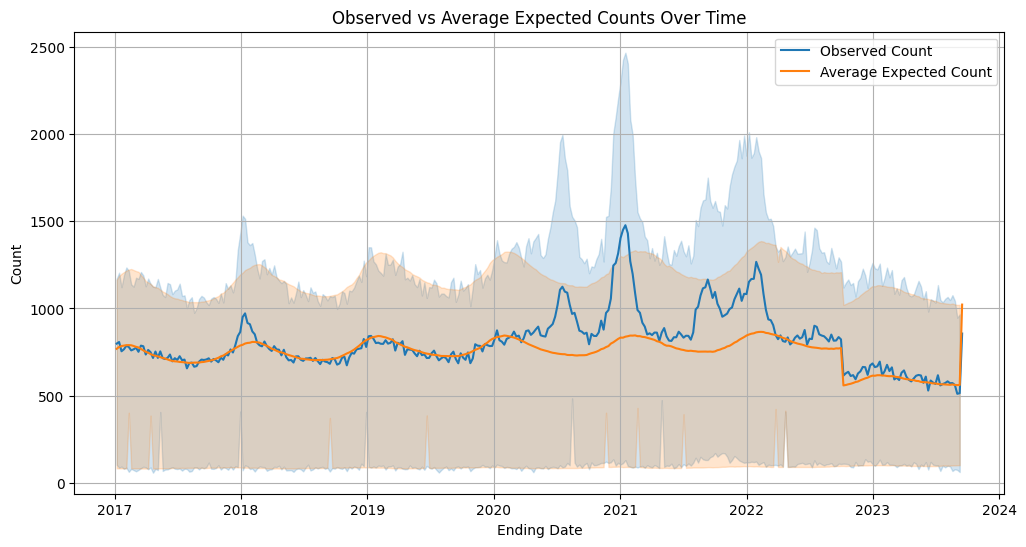

In [214]:
def generate_observed_vs_expected_plot():
    """
    This function utilizes the 'ending_date' column for the x-axis, representing time, 'observed_count' for the y-axis depicting observed counts,
    and 'average_expected_count' for the average expected counts. The resulting plot visually displays the observed and
    expected counts trends over the specified time period. Grid lines are added for
    enhanced clarity in interpretation.

    """
# Setting up the figure size, creating a line plots for observed and average expected counts over time,
plt.figure(figsize=(12, 6))
sns.lineplot(x='ending_date', y='observed_count', data=covid19_deaths, label='Observed Count')
sns.lineplot(x='ending_date', y='average_expected_count', data=covid19_deaths, label='Average Expected Count')

# Customizing the plot
plt.title('Observed vs Average Expected Counts Over Time')
plt.xlabel('Ending Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

# Showing the plot
plt.show()



---



# **Final Integrated Data**

Covid-19 datasets to present a comprehensive view of the pandemic's impact. Starting with individual datasets on hospital beds, staffing, and deaths, the process focused on meticulous data cleaning—addressing missing values, renaming columns, and ensuring uniformity.

The subsequent phase included merging datasets based on common features like 'state_name.' Standardization, outlier identification, and column selection followed. The resulting integrated dataset combines critical metrics, allowing in-depth analysis of Covid-19's effects on healthcare resources, staffing dynamics, and mortality rates.

The process extended to creating visualizations, custom pivot tables, and aggregating data by year. Field-level transformations, such as scaling, normalized the data. The final integrated dataset, enriched with summary metrics and categorized columns, lays the groundwork for insightful analysis and informed decision-making.

In [215]:
# Converting 'state_name' column values to lowercase for consistency in merging in third dataset
covid19_deaths['state_name'] = covid19_deaths['state_name'].str.lower()

# Combining COVID-19 hospital bed, staffing, and deaths data for a comprehensive dataset
# This merge is based on the 'state_name' column using an inner join for common states.
integrated_data = pd.merge(merged_hospital_staffing_data, covid19_deaths,
                           on='state_name', how='inner')

# Displaying Combined data
integrated_data

,county_name,state_name,total_hospital_beds,cardiac_intensive_care_beds,adult_med_surg_beds,pediatric_med_surg_beds,medical_surgical_intensive_care_beds,obstetric_care_beds,pediatric_intensive_care_beds,physical_rehabilitation_care_beds,...,medical_surgical_intensive_care_fte,neonatal_care_fte,pediatric_intensive_care_fte,ending_date,observed_count,upper_bound_threshold,average_expected_count,total_excess_estimate,percent_excess_estimate,year
0,jefferson county,alabama,2.091578,180,1578,159,275,170,24,105,...,68.0,51.0,26.0,2017-01-07,1121.0,1136,1059,29601.0,5.852700,2017
1,jefferson county,alabama,2.091578,180,1578,159,275,170,24,105,...,68.0,51.0,26.0,2017-01-14,1130.0,1140,1067,29601.0,5.906102,2017
2,jefferson county,alabama,2.091578,180,1578,159,275,170,24,105,...,68.0,51.0,26.0,2017-01-21,1048.0,1142,1071,29601.0,0.000000,2017
3,jefferson county,alabama,2.091578,180,1578,159,275,170,24,105,...,68.0,51.0,26.0,2017-01-28,1026.0,1142,1070,29601.0,0.000000,2017
4,jefferson county,alabama,2.091578,180,1578,159,275,170,24,105,...,68.0,51.0,26.0,2017-02-04,1036.0,1142,1068,29601.0,0.000000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,fairbanks north star borough,alaska,-0.217358,6,57,12,7,18,0,0,...,36.0,19.0,0.0,2023-08-12,94.0,116,99,2829.0,0.000000,2023
19239,fairbanks north star borough,alaska,-0.217358,6,57,12,7,18,0,0,...,36.0,19.0,0.0,2023-08-19,68.0,117,100,2829.0,0.000000,2023
19240,fairbanks north star borough,alaska,-0.217358,6,57,12,7,18,0,0,...,36.0,19.0,0.0,2023-08-26,78.0,117,100,2829.0,0.000000,2023
19241,fairbanks north star borough,alaska,-0.217358,6,57,12,7,18,0,0,...,36.0,19.0,0.0,2023-09-02,74.0,118,101,2829.0,0.000000,2023


In [216]:
integrated_data.columns

Index(['county_name', 'state_name', 'total_hospital_beds',
       'cardiac_intensive_care_beds', 'adult_med_surg_beds',
       'pediatric_med_surg_beds', 'medical_surgical_intensive_care_beds',
       'obstetric_care_beds', 'pediatric_intensive_care_beds',
       'physical_rehabilitation_care_beds', 'psychiatric_care_beds',
       'airborne_infection_isolation_rooms', 'total_personnel_ft',
       'total_hospital_unit_personnel_ft', 'physicians_and_dentists_ft',
       'laboratory_technicians_ft', 'medical_dental_residents_interns_ft',
       'nursing_assistive_personnel_ft', 'pharmacists_licensed_ft',
       'pharmacy_technicians_ft', 'radiology_technicians_ft',
       'registered_nurses_ft', 'respiratory_therapists_ft',
       'total_nursing_home_personnel_ft', 'cardiac_intensive_care_fte',
       'intensivists_fte_total', 'medical_surgical_intensive_care_fte',
       'neonatal_care_fte', 'pediatric_intensive_care_fte', 'ending_date',
       'observed_count', 'upper_bound_threshold', 

In [217]:
integrated_data = integrated_data.drop_duplicates() # Removing any duplicates present in the integrated_data

In [218]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 0 to 19242
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   county_name                           19243 non-null  object        
 1   state_name                            19243 non-null  object        
 2   total_hospital_beds                   19243 non-null  float64       
 3   cardiac_intensive_care_beds           19243 non-null  Int64         
 4   adult_med_surg_beds                   19243 non-null  Int64         
 5   pediatric_med_surg_beds               19243 non-null  Int64         
 6   medical_surgical_intensive_care_beds  19243 non-null  Int64         
 7   obstetric_care_beds                   19243 non-null  Int64         
 8   pediatric_intensive_care_beds         19243 non-null  Int64         
 9   physical_rehabilitation_care_beds     19243 non-null  Int64         
 10

# **Pivot Table**

In [219]:
def generate_custom_pivot_table():
    """
    Create a customized pivot table from the integrated dataset.

    This function extracts specific columns from the integrated dataset, aggregating values for specified columns. It then creates a
    pivot table grouping by 'county_name' and 'state_name'.

    """
    # Defining the specified columns for pivoting
    pivot_columns = ['total_hospital_beds',
                     'cardiac_intensive_care_beds', 'total_personnel_ft',
                     'registered_nurses_ft', 'pharmacy_technicians_ft',
                     'cardiac_intensive_care_fte', 'neonatal_care_fte']

    # Creating a pivot table by aggregating values for specified columns
    # Grouping the data by 'county_name' and 'state_name'
    custom_pivot_table = integrated_data.pivot_table(
        index=['county_name', 'state_name'],
        values=pivot_columns,
        aggfunc='sum'
    )

    return custom_pivot_table

# usage
integrated_data_pivot_table = generate_custom_pivot_table()

integrated_data_pivot_table # Displaying the pivot table

,,cardiac_intensive_care_beds,cardiac_intensive_care_fte,neonatal_care_fte,pharmacy_technicians_ft,registered_nurses_ft,total_hospital_beds,total_personnel_ft
county_name,state_name,,,,,,,
barbour county,alabama,2450,2800,1050.0,350.0,9800.0,-113.259559,-122.920296
bullock county,alabama,2450,2800,1050.0,700.0,14700.0,-111.896780,-122.636567
butler county,alabama,2450,2800,1050.0,350.0,11550.0,-110.534002,-122.510465
cherokee county,alabama,0,2800,1050.0,350.0,9450.0,-113.648924,-124.685720
choctaw county,alabama,2450,2800,1050.0,350.0,5600.0,-117.542577,-125.442330
clarke county,alabama,2450,2800,1050.0,700.0,18200.0,-110.728684,-120.366736
clay county,alabama,2450,2800,1050.0,1050.0,23450.0,-97.295582,-118.475210
coconino county,arizona,5400,4800,2400.0,1200.0,31800.0,-137.089418,-37.256916
coffee county,alabama,0,2800,1050.0,1050.0,27300.0,-103.136061,-118.632838


# **Data Aggregation**

In [220]:
def add_year_and_aggregate_by_year():

    """
    This function enhances the 'integrated_data' DataFrame by appending a 'year' column derived from 'ending_date'.
    Subsequently, it aggregates data based on 'county_name', 'state_name', and 'year', summing specific columns and averaging 'total_excess_estimate'.

    """
    # Adding 'year' column based on 'ending_date'
    integrated_data['year'] = integrated_data['ending_date'].dt.year

    # Aggregated the data by 'county_name', 'state_name', and 'year'
    integrated_data.groupby(['county_name', 'state_name', 'year']).agg({
        'observed_count': 'sum',
        'upper_bound_threshold': 'sum',
        'average_expected_count': 'sum',
        'total_excess_estimate': 'mean',
    }).reset_index()

#usage
add_year_and_aggregate_by_year()

# **Field-level Transformation**

In [221]:
# Importing the MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# scaling the 'totla_excess_estimate' column in the "integrated_data" Dataframe
integrated_data[['total_excess_estimate']] = scaler.fit_transform(integrated_data[['total_excess_estimate']])

integrated_data[['total_excess_estimate']] # Displaying the scaling data

,total_excess_estimate
0,0.697369
1,0.697369
2,0.697369
3,0.697369
4,0.697369
...,...
19238,0.000000
19239,0.000000
19240,0.000000
19241,0.000000


In [222]:
# Grouping 'integrated_data' by 'county_name' and 'state_name' to calculate the mean of 'percent_excess_estimate'
summary_metrics = integrated_data.groupby(['county_name', 'state_name']).agg({
    'percent_excess_estimate': 'mean',
}).reset_index()

summary_metrics

,county_name,state_name,percent_excess_estimate
0,barbour county,alabama,8.786406
1,bullock county,alabama,8.786406
2,butler county,alabama,8.786406
3,cherokee county,alabama,8.786406
4,choctaw county,alabama,8.786406
5,clarke county,alabama,8.786406
6,clay county,alabama,8.786406
7,coconino county,arizona,11.117672
8,coffee county,alabama,8.786406
9,conecuh county,alabama,8.786406


In [223]:
# Specify bin edges and labels
bin_edges = [0, 200, 400, 600]
bin_labels = ["Low", "Medium", "High"]

# List of numeric columns to apply binning
numeric_columns_to_bin = ['total_hospital_beds', 'cardiac_intensive_care_beds']

# Apply binning to each numeric column
for column in numeric_columns_to_bin:
    integrated_data[f'{column}_bin'] = pd.cut(integrated_data[column], bins=bin_edges, labels=bin_labels)

# **Problem Applicability:**

The project, centered around integrating Covid-19 datasets on hospital resources, staffing, and mortality, demonstrates relevance in healthcare and beyond. Through the analysis of these interconnected factors, the program serves practical purposes in:


Practical Application and Theoretical Impact Analysis:


Aids healthcare professionals in strategically distributing resources and staff based on pandemic trends.

Assists public health officials in devising focused strategies, particularly in regions with resource disparities.

Provides insights for health insurance companies to assess risks and formulate effective policies.

Offers valuable data for researchers to understand and develop strategies against the changing dynamics of Covid-19.

Supports the creation of robust strategies for addressing future health crises through evidence-based insights.


This program's comprehensive analysis contributes to informed decision-making in healthcare, public health, and policy realms.

# **Conclusion**

In summary, the Intergrated data of Covid-19 datasets involving hospital resources, staffing details, and mortality rates delivers a comprehensive perspective on the pandemic's impact. The program, designed for practical utility, offers crucial insights for strategic healthcare resource allocation, targeted public health interventions, and informed policy-making. Moreover, it provides valuable data for research and contributes to emergency preparedness planning. This approach not only aids in comprehending and managing the current pandemic but also establishes a framework for addressing future health crises through evidence-based strategies. The interconnected analysis serves as a potent tool in guiding effective responses and enhancing resilience in healthcare systems.